@ Time: 17/03/2020

@ Edited: 10/04/2020

@ Author: ZHANG Mofan @ Tsinghua University & Ecole des Ponts ParisTech & Ecole centrale de Lyon

@ File name: TP_Reseau_Notebook

# Travaux pratiques sur les réseaux d'eau

## 0. Données et fonctions du problème

### On charge dans l'environnement :
1. les fonctions de Python qui seront utilisées,
2. les données du problème,
3. les fonctions utilitaires du problème.

In [28]:
from numpy import random

In [29]:
from Probleme_R import *
from Structures_N import *
import numpy as np

In [30]:
from Visualg import Visualg
from Verification import Verification

###  On charge les prototypes d'algorithmes d'optimisation :

* **Gradient_F** : algorithme de gradient à pas fixe,
* **Newton_F** : algorithme de Newton à pas fixe.

In [31]:
def Gradient_F(Oracle, x0, alpha):
    
    from numpy.linalg import norm
    from time import process_time
    
    ##### Initialisation des variables
    
    iter_max = 10000
    gradient_step = alpha
    threshold = 0.000001
    
    gradient_norm_list = []
    gradient_step_list = []
    critere_list = []

    time_start = process_time()
    
    x = x0

    ##### Boucle sur les iterations

    for k in range(iter_max):
        
        # Valeur du critere et du gradient
        critere, gradient = Oracle(x)

        # Test de convergence
        gradient_norm = norm(gradient)
        if gradient_norm <= threshold:
            break

        # Direction de descente
        direction = -gradient
        
        # Mise a jour des variables
        x = x + (gradient_step*direction)
        
        # Evolution du gradient, du pas, et du critere
        gradient_norm_list.append(gradient_norm)
        gradient_step_list.append(gradient_step)
        critere_list.append(critere)
    
    ##### Resultats de l'optimisation

    critere_opt = critere
    gradient_opt = gradient
    x_opt = x
    time_cpu = process_time() - time_start
    
    print()
    print('Iteration :', k)
    print('Temps CPU :', time_cpu)
    print('Critere optimal :', critere_opt)
    print('Norme du gradient :', norm(gradient_opt))
    
    # Visualisation de la convergence
    Visualg(gradient_norm_list, gradient_step_list, critere_list)
    
    return critere_opt, gradient_opt, x_opt

In [32]:
def Newton_F(Oracle, x0):
    
    from numpy.linalg import norm
    from numpy.linalg import solve
    from time import process_time
    
    ##### Initialisation des variables    
    
    iter_max = 100
    gradient_step = 1
    threshold = 0.000001
    
    gradient_norm_list = []
    gradient_step_list = []
    critere_list = []

    time_start = process_time()
    
    x = x0

    ##### Boucle sur les iterations
    
    for k in range(iter_max):
        
        # Valeur du critere et du gradient
        critere, gradient, hessien = Oracle(x)

        # Test de convergence
        gradient_norm = norm(gradient)
        if gradient_norm <= threshold:
            break
        
        # Direction de descente
        direction = - solve(hessien, gradient)
        
        # Mise a jour des variables
        x = x + (gradient_step*direction)
        
        # Evolution du gradient, du pas, et du critere
        gradient_norm_list.append(gradient_norm)
        gradient_step_list.append(gradient_step)
        critere_list.append(critere)
   
    ##### Resultats de l'optimisation
    
    critere_opt = critere
    gradient_opt = gradient
    x_opt = x
    time_cpu = process_time() - time_start

    print()
    print('Iteration :', k)
    print('Temps CPU :', time_cpu)
    print('Critere optimal :', critere_opt)
    print('Norme du gradient :', norm(gradient_opt))
    
    # Visualisation de la convergence
    Visualg(gradient_norm_list, gradient_step_list, critere_list)
    
    return critere_opt, gradient_opt, x_opt

## I. Résolution du problème primal

In [33]:
from HydrauliqueP import HydrauliqueP

### I.a On écrit les oracles pour le problème primal d'optimisation :

* **OraclePG** : calcul de la fonction et du gradient,
* **OraclePH** : calcul de la fonction du gradient et du Hessien.

In [34]:
def OraclePG(qc):
    # valeur du critère évalué au point qc
    term1 = q0 + B.dot(qc)
    term2 = np.multiply(np.multiply(r, term1), np.abs(term1))
    term3 = 1/3 * np.transpose(term2).dot(term1)
    term4 = Ar.dot(term1)
    term5 = np.transpose(term4).dot(pr)
    critere = term3 + term5

    # vecteur des dérivées du critère par rapport à qc
    gradient = np.transpose(B).dot(term2) + np.transpose(B).dot(np.transpose(Ar)).dot(pr)
    
    return critere, gradient

In [35]:
def OraclePH(qc):
    # valeur du critère évalué au point qc
    term1 = q0 + B.dot(qc)
    term2 = np.multiply(np.multiply(r, term1), np.abs(term1))
    term3 = 1/3 * np.transpose(term2).dot(term1)
    term4 = Ar.dot(term1)
    term5 = np.transpose(term4).dot(pr)
    critere = term3 + term5

    # vecteur des dérivées du critère par rapport à qc
    gradient = np.transpose(B).dot(term2) + np.transpose(B).dot(np.transpose(Ar)).dot(pr)

    # matrice des dérivées secondes du critère par rapport à qc
    term6 = 2 * np.multiply(r, np.abs(term1))
    term7 = np.diag(term6.flatten())
    term8 = np.transpose(B).dot(term7)
    hessien = term8.dot(B)
    
    return critere, gradient, hessien

In [36]:
def Oracle(qc):
    # valeur du critère évalué au point qc
    term1 = q0 + B.dot(qc)
    term2 = np.multiply(np.multiply(r, term1), np.abs(term1))
    term3 = 1/3 * np.transpose(term2).dot(term1)
    term4 = Ar.dot(term1)
    term5 = np.transpose(term4).dot(pr)
    critere = term3 + term5

    # vecteur des dérivées du critère par rapport à qc
    gradient = np.transpose(B).dot(term2) + np.transpose(B).dot(np.transpose(Ar)).dot(pr)

    # matrice des dérivées secondes du critère par rapport à qc
    term6 = 2 * np.multiply(r, np.abs(term1))
    term7 = np.diag(term6.flatten())
    term8 = np.transpose(B).dot(term7)
    hessien = term8.dot(B)
    
    return critere, gradient, hessien

### On teste la validité des oracles en résolvant le problème :

* **OraclePG** avec la méthode du gradient à pas fixe,
* **OraclePH** avec la méthode de Newton à pas fixe


MINIMISATION DU PROBLEME PRIMAL

ALGORITHME DU GRADIENT A PAS FIXE

Iteration : 4121
Temps CPU : 0.140625
Critere optimal : -3.7340070480434893
Norme du gradient : 9.98212016787375e-07


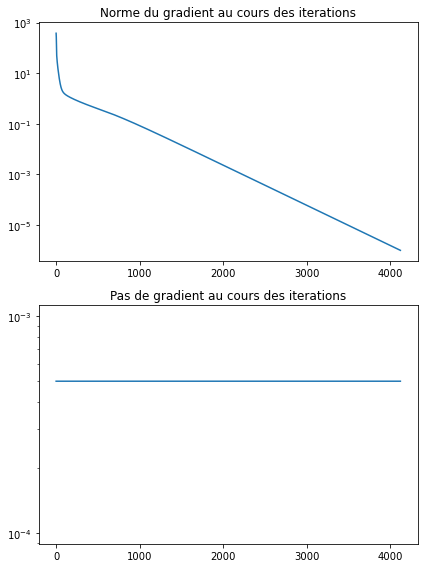


Verification des equations d'equilibre du reseau
Sur les debits : 2.220446049250313e-16
Sur les pressions : 9.982068317482273e-07


In [37]:
x0 = 0.1 * random.normal(size=n-md)
print()
print("MINIMISATION DU PROBLEME PRIMAL")
print()
print("ALGORITHME DU GRADIENT A PAS FIXE")
copt, gopt, xopt = Gradient_F(OraclePG, x0, 0.0005)
qopt, zopt, fopt, popt = HydrauliqueP(xopt, m, mr, md, r, pr, fd, Ar, AdI, B, q0)
Verification(A, qopt, zopt, fopt, popt)


MINIMISATION DU PROBLEME PRIMAL

ALGORITHME DE NEWTON A PAS FIXE

Iteration : 5
Temps CPU : 0.0
Critere optimal : -3.734007048043562
Norme du gradient : 6.828749004969902e-08


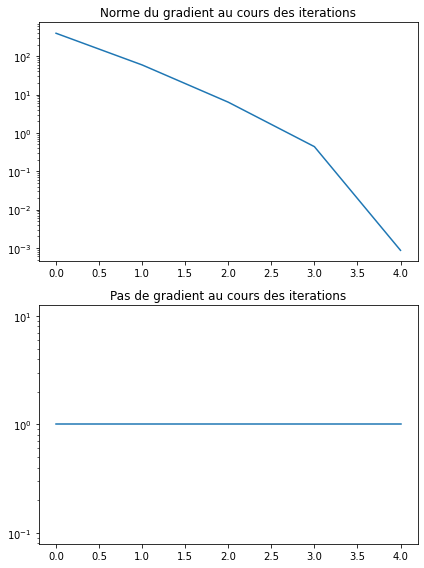


Verification des equations d'equilibre du reseau
Sur les debits : 2.220446049250313e-16
Sur les pressions : 4.7957515562913056e-08


In [38]:
x0 = 0.1 * random.normal(size=n-md)
print()
print("MINIMISATION DU PROBLEME PRIMAL")
print()
print("ALGORITHME DE NEWTON A PAS FIXE")
copt, gopt, xopt = Newton_F(OraclePH, x0)
qopt, zopt, fopt, popt = HydrauliqueP(xopt, m, mr, md, r, pr, fd, Ar, AdI, B, q0)
Verification(A, qopt, zopt, fopt, popt)

### I.b On écrit l'algorithme de recherche linéaire (conditions de Wolfe).

In [39]:
def Wolfe(alpha, x, D, Oracle):
    
    from numpy import dot
    from numpy import inf
    from numpy.linalg import norm

    ##### Coefficients de la recherche lineaire
    
    omega_1 = 0.1
    omega_2 = 0.9
    
    alpha_min = 0
    alpha_max = inf
    
    ok = 0
    dltx = 0.00000001

    ##### Algorithme de Fletcher-Lemarechal
    
    # Appel de l'oracle au point initial
    argout = Oracle(x)
    critere = argout[0]
    gradient = argout[1]
    
    # Initialisation de l'algorithme
    alpha_n = alpha
    xn = x
    
    # Boucle de calcul du pas
    # xn represente le point pour la valeur courante du pas,
    # xp represente le point pour la valeur precedente du pas.
    while ok == 0:
        
        # Point precedent pour tester l'indistinguabilite
        xp = xn
        
        # Point actuel
        xn = x + alpha_n*D
        
        # Calcul des conditions de Wolfe
        argout_n = Oracle(xn)
        critere_n = argout_n[0]
        gradient_n = argout_n[1]
        #critere_n, gradient_n = Oracle(xn)
        
        # Test des conditions de Wolfe
        #
        # - Si les deux conditions de Wolfe sont verifiees,
        #   poser ok = 1 : on sort alors de la boucle while
        # - Sinon, modifier la valeur de alphan et reboucler
        if critere_n > (critere + omega_1 * alpha_n * np.transpose(gradient).dot(D)):
            alpha_max = alpha_n
            alpha_n = 1/2 * (alpha_min + alpha_max)
        else:
            if (np.transpose(gradient_n).dot(D)) < (omega_2 * np.transpose(gradient).dot(D)):
                alpha_min = alpha_n
                if alpha_max == inf:
                    alpha_n = 2 * alpha_min
                else:
                    alpha_n = 1/2 * (alpha_min + alpha_max)
            else:
                ok = 1         
        
        # Test d'indistinguabilite
        if norm(xn - xp) < dltx:
            ok = 2

    return alpha_n, ok

### I.c On écrit l'algorithme du gradient à pas variable et on le teste

In [40]:
def Gradient_V(Oracle, x0, alpha):
    
    from numpy.linalg import norm
    from time import process_time
    
    ##### Initialisation des variables

    #iter_max = 1000
    iter_max = 10000
    default_gradient_step = alpha
    threshold = 0.000001
    
    gradient_norm_list = []
    gradient_step_list = []
    critere_list = []
    
    time_start = process_time()

    x = x0

    ##### Boucle sur les iterations

    for k in range(iter_max):
        critere, gradient = Oracle(x)
        
        gradient_norm = norm(gradient)
        if gradient_norm <= threshold:
            break
        
        direction = - gradient
        
        gradient_step, ok = Wolfe(default_gradient_step, x, direction, Oracle)
        
        x = x + gradient_step * direction
        
        gradient_norm_list.append(gradient_norm)
        gradient_step_list.append(gradient_step)
        critere_list.append(critere)
    
    ##### Resultats de l'optimisation
    critere_opt = critere
    gradient_opt = gradient
    x_opt = x
    time_cpu = process_time() - time_start

    print()
    print('Iteration :', k)
    print('Temps CPU :', time_cpu)
    print('Critere optimal :', critere_opt)
    print('Norme du gradient :', norm(gradient_opt))
    
    # Visualisation de la convergence
    Visualg(gradient_norm_list, gradient_step_list, critere_list)
    
    return critere_opt, gradient_opt, x_opt


MINIMISATION DU PROBLEME PRIMAL

ALGORITHME DU GRADIENT A PAS VARIABLE

Iteration : 287
Temps CPU : 0.109375
Critere optimal : -3.734007048043498
Norme du gradient : 9.63686758669762e-07


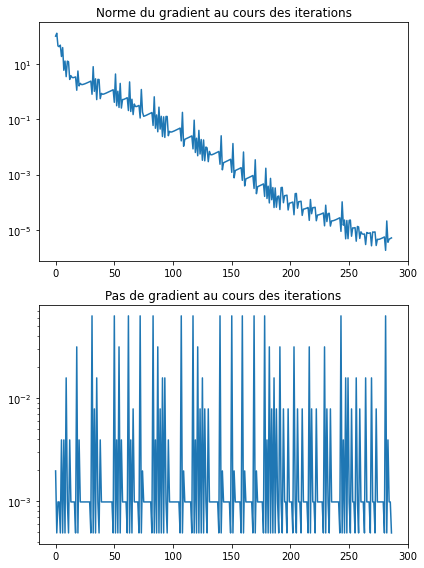


Verification des equations d'equilibre du reseau
Sur les debits : 1.1102230246251565e-16
Sur les pressions : 9.36211753566063e-07


In [41]:
x0 = 0.1 * random.normal(size=n-md)
print()
print("MINIMISATION DU PROBLEME PRIMAL")
print()
print("ALGORITHME DU GRADIENT A PAS VARIABLE")
copt, gopt, xopt = Gradient_V(OraclePG, x0, 1)
qopt, zopt, fopt, popt = HydrauliqueP(xopt, m, mr, md, r, pr, fd, Ar, AdI, B, q0)
Verification(A, qopt, zopt, fopt, popt)

### I.d On écrit l'algorithme de gradient conjugué (Polak-Ribière) et on le teste

In [42]:
def PolakRibiere(Oracle, x0, alpha):
    
    from numpy import dot
    from numpy.linalg import norm
    from time import process_time
    
    ##### Initialisation des variables

    iter_max = 1000
    default_gradient_step = alpha
    threshold = 0.000001
    
    gradient_norm_list = []
    gradient_step_list = []
    critere_list = []
    
    time_start = process_time()

    x = x0
    
    ##### Boucle sur les iterations
    
    for k in range(iter_max):
        # Attention a l'initialisation de l'algorithme !
        critere, gradient = Oracle(x)
        
        gradient_norm = norm(gradient)
        if gradient_norm <= threshold:
            break
        
        if k == 0:
            direction = - gradient
        else:
            #Fletcher-Reeves
            #belta = np.transpose(gradient).dot(gradient) / np.transpose(gradient_p).dot(gradient_p)
            #Polak-Ribière
            belta = (np.transpose(gradient).dot(gradient - gradient_p)) / pow(norm(gradient_p), 2)
            direction = - gradient + belta * direction_p
       
        gradient_step, ok = Wolfe(default_gradient_step, x, direction, Oracle)
        
        x = x + gradient_step * direction
        
        gradient_p = gradient
        direction_p = direction
        
        gradient_norm_list.append(gradient_norm)
        gradient_step_list.append(gradient_step)
        critere_list.append(critere)

    # Resultat de l'optimisation
    critere_opt = critere
    gradient_opt = gradient
    x_opt = x
    time_cpu = process_time() - time_start

    print()
    print('Iteration :', k)
    print('Temps CPU :', time_cpu)
    print('Critere optimal :', critere_opt)
    print('Norme du gradient :', norm(gradient_opt))
        
    # Visualisation de la convergence
    Visualg(gradient_norm_list, gradient_step_list, critere_list)
    
    return critere_opt, gradient_opt, x_opt


MINIMISATION DU PROBLEME PRIMAL

ALGORITHME DU GRADIENT CONJUGUE

Iteration : 165
Temps CPU : 0.109375
Critere optimal : -3.734007048043555
Norme du gradient : 7.986884642974135e-07


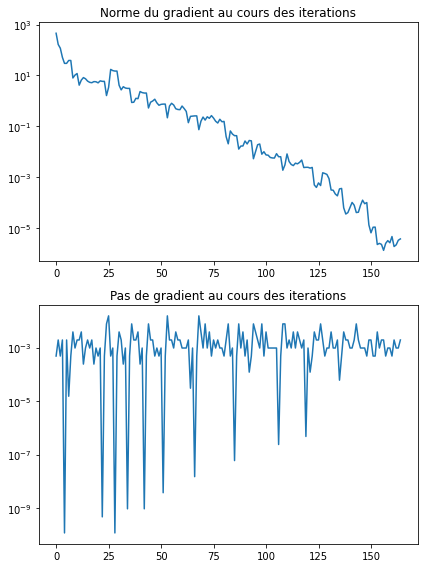


Verification des equations d'equilibre du reseau
Sur les debits : 2.220446049250313e-16
Sur les pressions : 4.4158304124408687e-07


In [43]:
x0 = 0.1 * random.normal(size=n-md)
print()
print("MINIMISATION DU PROBLEME PRIMAL")
print()
print("ALGORITHME DU GRADIENT CONJUGUE")
copt, gopt, xopt = PolakRibiere(OraclePG, x0, 1)
qopt, zopt, fopt, popt = HydrauliqueP(xopt, m, mr, md, r, pr, fd, Ar, AdI, B, q0)
Verification(A, qopt, zopt, fopt, popt)

### I.e On écrit l'algorithme de quasi-Newton (BFGS) et on le teste

In [44]:
def BFGS(Oracle, x0):
    
    from numpy import dot
    from numpy import eye
    from numpy import outer
    from numpy import vdot
    from numpy.linalg import norm
    from time import process_time
    
    ##### Initialisation des variables

    iter_max = 250
    default_gradient_step = 1
    threshold = 0.000001
    
    gradient_norm_list = []
    gradient_step_list = []
    critere_list = []
    
    time_start = process_time()

    x = x0

    ##### Boucle sur les iterations
    
    for k in range(iter_max):
        # Attention a l'initialisation de l'algorithme !
        critere, gradient = Oracle(x)
        
        gradient_norm = norm(gradient)
        if gradient_norm <= threshold:
            break
        
        if k == 0:
            W = np.eye(x0.shape[0])
        else:
            delta_x = x - x_p
            delta_g = gradient - gradient_p
            mat_1 = np.eye(x0.shape[0]) - np.outer(delta_x, delta_g)/np.vdot(delta_g, delta_x)
            mat_2 = np.eye(x0.shape[0]) - np.outer(delta_g, delta_x)/np.vdot(delta_g, delta_x)
            mat_3 = np.outer(delta_x, delta_x)/np.vdot(delta_g, delta_x)
            W = mat_1.dot(W).dot(mat_2) + mat_3
        
        direction = - W.dot(gradient)
        
        gradient_step, ok = Wolfe(default_gradient_step, x, direction, Oracle)
        
        x_p = x # x_p : le point précédent
        x = x + gradient_step * direction
        
        gradient_p = gradient # le gradient de f en point précédent
        
        gradient_norm_list.append(gradient_norm)
        gradient_step_list.append(gradient_step)
        critere_list.append(critere)
    
    # Resultat de l'optimisation
    critere_opt = critere
    gradient_opt = gradient
    x_opt = x
    time_cpu = process_time() - time_start

    print()
    print('Iteration :', k)
    print('Temps CPU :', time_cpu)
    print('Critere optimal :', critere_opt)
    print('Norme du gradient :', norm(gradient_opt))
        
    # Visualisation de la convergence
    Visualg(gradient_norm_list, gradient_step_list, critere_list)
    
    return critere_opt, gradient_opt, x_opt


MINIMISATION DU PROBLEME PRIMAL

ALGORITHME DE QUASI-NEWTON

Iteration : 23
Temps CPU : 0.0
Critere optimal : -3.734007048043562
Norme du gradient : 6.588045653658297e-07


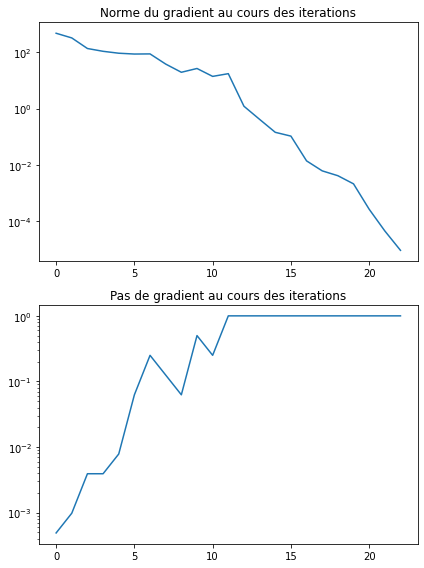


Verification des equations d'equilibre du reseau
Sur les debits : 2.220446049250313e-16
Sur les pressions : 4.3816684369701875e-07


In [45]:
x0 = 0.1 * random.normal(size=n-md)
print()
print("MINIMISATION DU PROBLEME PRIMAL")
print()
print("ALGORITHME DE QUASI-NEWTON")
copt, gopt, xopt = BFGS(OraclePG, x0)
qopt, zopt, fopt, popt = HydrauliqueP(xopt, m, mr, md, r, pr, fd, Ar, AdI, B, q0)
Verification(A, qopt, zopt, fopt, popt)

### I.f On écrit l'algorithme de Newton à pas variable et on le teste

In [46]:
# Question : pourquoi le pas de descente alpha ne varie pas ?
def Newton_V(Oracle, x0):
    
    from numpy.linalg import norm
    from numpy.linalg import solve
    from time import process_time
    
    ##### Initialisation des variables  
    
    iter_max = 100
    default_gradient_step = 1
    threshold = 0.000001
    
    gradient_norm_list = []
    gradient_step_list = []
    critere_list = []

    time_start = process_time()
    
    x = x0

    ##### Boucle sur les iterations
    
    for k in range(iter_max):
        critere, gradient, hessien = Oracle(x)
        
        gradient_norm = norm(gradient)
        if gradient_norm <= threshold:
            break
        
        direction = - solve(hessien, gradient)
        
        gradient_step, ok = Wolfe(default_gradient_step, x, direction, Oracle)
        
        x = x + gradient_step * direction
        
        gradient_norm_list.append(gradient_norm)
        gradient_step_list.append(gradient_step)
        critere_list.append(critere)
           
    ##### Resultats de l'optimisation
    
    critere_opt = critere
    gradient_opt = gradient
    x_opt = x
    time_cpu = process_time() - time_start

    print()
    print('Iteration :', k)
    print('Temps CPU :', time_cpu)
    print('Critere optimal :', critere_opt)
    print('Norme du gradient :', norm(gradient_opt))
    
    # Visualisation de la convergence
    Visualg(gradient_norm_list, gradient_step_list, critere_list)
    
    return critere_opt, gradient_opt, x_opt


MINIMISATION DU PROBLEME PRIMAL

ALGORITHME DE NEWTON A PAS VARIABLE

Iteration : 6
Temps CPU : 0.0
Critere optimal : -3.734007048043562
Norme du gradient : 7.229708126354238e-11


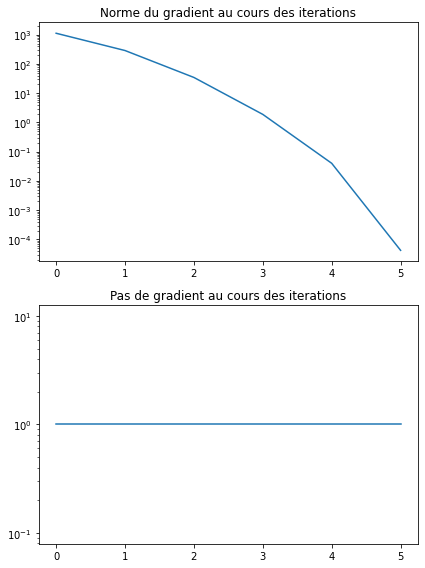


Verification des equations d'equilibre du reseau
Sur les debits : 1.6653345369377348e-16
Sur les pressions : 3.796964131996816e-11


In [47]:
x0 = 0.1 * random.normal(size=n-md)
print()
print("MINIMISATION DU PROBLEME PRIMAL")
print()
print("ALGORITHME DE NEWTON A PAS VARIABLE")
copt, gopt, xopt = Newton_V(OraclePH, x0)
qopt, zopt, fopt, popt = HydrauliqueP(xopt, m, mr, md, r, pr, fd, Ar, AdI, B, q0)
Verification(A, qopt, zopt, fopt, popt)

## II. Résolution du problème dual

In [48]:
from HydrauliqueD import HydrauliqueD

### II.a On écrit les oracles pour le problème dual d'optimisation :

* **OracleDG** : calcul de la fonction et du gradient,
* **OracleDH** : calcul de la fonction du gradient et du Hessien.

In [49]:
def OracleDG(pd):
    q_hat = np.zeros(r.shape[0])
    term0 = np.transpose(Ar).dot(pr) + np.transpose(Ad).dot(pd)
    for i in range(r.shape[0]):
        if term0[i]/r[i] >= 0 :
            q_hat[i] = -np.sqrt(term0[i]/r[i])
        else :
            q_hat[i] = np.sqrt(-term0[i]/r[i])
    
    term1 = np.multiply(np.multiply(r, q_hat), np.abs(q_hat))
    term2 = 1/3 * np.transpose(term1).dot(q_hat)
    term3 = Ar.dot(q_hat)
    term4 = np.transpose(term3).dot(pr)
    term5 = Ad.dot(q_hat) - fd
    term6 = np.transpose(term5).dot(pd)
    critere = -(term2 + term4 + term6)
    
    gradient = -(Ad.dot(q_hat) - fd)
    return critere, gradient

In [50]:
def OracleDH(pd):
    q_hat = np.zeros(r.shape[0])
    term0 = np.transpose(Ar).dot(pr) + np.transpose(Ad).dot(pd)
    for i in range(r.shape[0]):
        if term0[i]/r[i] >= 0 :
            q_hat[i] = -np.sqrt(term0[i]/r[i])
        else :
            q_hat[i] = np.sqrt(-term0[i]/r[i])
    
    term1 = np.multiply(np.multiply(r, q_hat), np.abs(q_hat))
    term2 = 1/3 * np.transpose(term1).dot(q_hat)
    term3 = Ar.dot(q_hat)
    term4 = np.transpose(term3).dot(pr)
    term5 = Ad.dot(q_hat) - fd
    term6 = np.transpose(term5).dot(pd)
    critere = -(term2 + term4 + term6)
    
    gradient = -(Ad.dot(q_hat) - fd)
    
    term7 = np.zeros([Ad.shape[1], Ad.shape[0]])
    for i in range(Ad.shape[1]):
        for j in range(Ad.shape[0]):
            if term0[i]/r[i] >= 0:
                term7[i][j] = 1 / (2 * q_hat[i] * r[i]) * np.transpose(Ad)[i][j]
            else:
                term7[i][j] = -1 / (2 * q_hat[i] * r[i]) * np.transpose(Ad)[i][j]
            
    hessien = -Ad.dot(term7)
    
    return critere, gradient, hessien

### II.b On exécute tous les algorithmes d'optimisation déjà écrits


MINIMISATION DU PROBLEME DUAL

ALGORITHME DU GRADIENT A PAS VARIABLE

Iteration : 4771
Temps CPU : 2.84375
Critere optimal : 3.7340070481372503
Norme du gradient : 9.896737208247085e-07


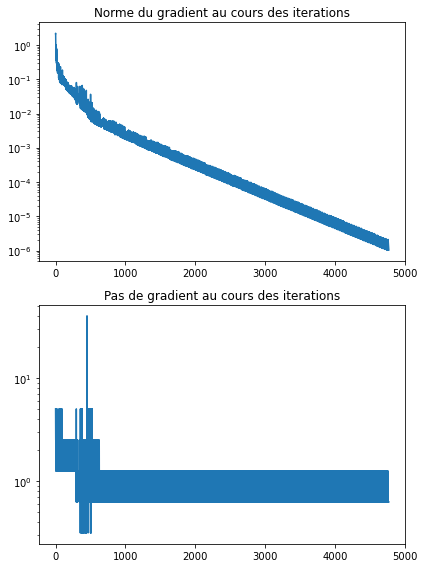


Verification des equations d'equilibre du reseau
Sur les debits : 6.967002746105511e-07
Sur les pressions : 0.0


In [51]:
x0 = 100 + random.normal(size=md)
print()
print("MINIMISATION DU PROBLEME DUAL")
print()
print("ALGORITHME DU GRADIENT A PAS VARIABLE")
copt, gopt, xopt = Gradient_V(OracleDG, x0, 5)
qopt, zopt, fopt, popt = HydrauliqueD(xopt, m, mr, r, pr, fd, A, Ar)
Verification(A, qopt, zopt, fopt, popt)


MINIMISATION DU PROBLEME DUAL

ALGORITHME DU GRADIENT CONJUGUE

Iteration : 353
Temps CPU : 0.28125
Critere optimal : 3.734007048171266
Norme du gradient : 8.71803203251197e-07


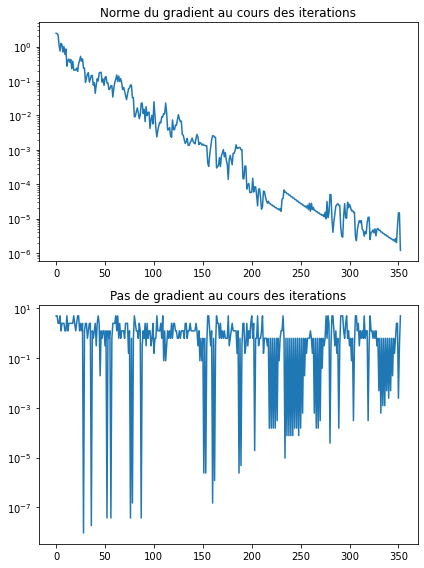


Verification des equations d'equilibre du reseau
Sur les debits : 7.963259366361441e-07
Sur les pressions : 0.0


In [52]:
x0 = 100 + random.normal(size=md)
print()
print("MINIMISATION DU PROBLEME DUAL")
print()
print("ALGORITHME DU GRADIENT CONJUGUE")
copt, gopt, xopt = PolakRibiere(OracleDG, x0, 5)
qopt, zopt, fopt, popt = HydrauliqueD(xopt, m, mr, r, pr, fd, A, Ar)
Verification(A, qopt, zopt, fopt, popt)


MINIMISATION DU PROBLEME DUAL

ALGORITHME DE QUASI-NEWTON

Iteration : 67
Temps CPU : 0.046875
Critere optimal : 3.7340070480443783
Norme du gradient : 7.032498221015272e-07


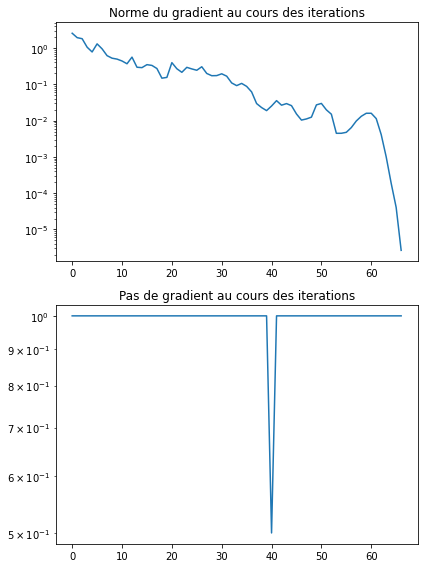


Verification des equations d'equilibre du reseau
Sur les debits : 3.977782812442099e-07
Sur les pressions : 0.0


In [53]:
x0 = 100 + random.normal(size=md)
print()
print("MINIMISATION DU PROBLEME DUAL")
print()
print("ALGORITHME DE QUASI-NEWTON")
copt, gopt, xopt = BFGS(OracleDG, x0)
qopt, zopt, fopt, popt = HydrauliqueD(xopt, m, mr, r, pr, fd, A, Ar)
Verification(A, qopt, zopt, fopt, popt)


MINIMISATION DU PROBLEME DUAL

ALGORITHME DE NEWTON A PAS VARIABLE

Iteration : 14
Temps CPU : 0.109375
Critere optimal : 3.734007048043583
Norme du gradient : 2.279896002759548e-08


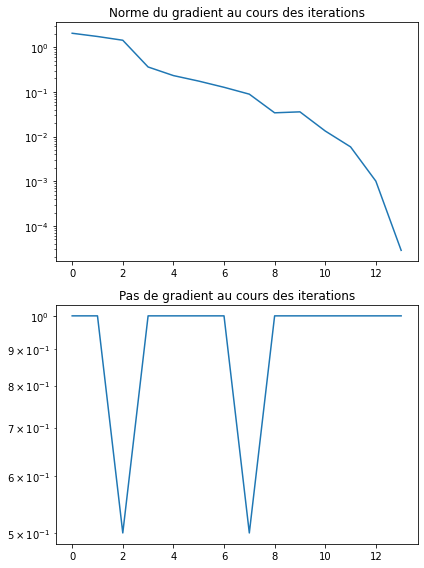


Verification des equations d'equilibre du reseau
Sur les debits : 2.2798959997683e-08
Sur les pressions : 0.0


In [54]:
x0 = 100 + random.normal(size=md)
print()
print("MINIMISATION DU PROBLEME DUAL")
print()
print("ALGORITHME DE NEWTON A PAS VARIABLE")
copt, gopt, xopt = Newton_V(OracleDH, x0)
qopt, zopt, fopt, popt = HydrauliqueD(xopt, m, mr, r, pr, fd, A, Ar)
Verification(A, qopt, zopt, fopt, popt)

## III. Résolution de grands réseaux (facultatif)

### On charge dans l'environnement les données du problème

Ces données correspondent à un réseau de taille paramétrable.

In [ ]:
from Probleme_P import *
from Structures_S import *

### III.a On écrit des oracles primal et dual avec Hessien creux

In [ ]:
def OraclePHS(qc):
    
    # ---> A COMPLETER
    # ---> A COMPLETER
    
    return critere, gradient, hessien

In [ ]:
def OracleDHS(pd):
    
    # ---> A COMPLETER
    # ---> A COMPLETER
    
    return critere, gradient, hessien

### III.b On écrit un algorithme de Newton exploitant le creux

In [ ]:
def Newton_S(Oracle, x0):
    
    from numpy.linalg import norm
    from scipy.sparse.linalg import spsolve
    from time import process_time
    
    ##### Initialisation des variables  
    
    iter_max = 100
    default_gradient_step = 1
    threshold = 0.000001
    
    gradient_norm_list = []
    gradient_step_list = []
    critere_list = []

    time_start = process_time()
    
    x = x0

    ##### Boucle sur les iterations
    
    for k in range(iter_max):
        
        # ---> A COMPLETER
        # ---> A COMPLETER
           
    ##### Resultats de l'optimisation
    
    critere_opt = critere
    gradient_opt = gradient
    x_opt = x
    time_cpu = process_time() - time_start

    print()
    print('Iteration :', k)
    print('Temps CPU :', time_cpu)
    print('Critere optimal :', critere_opt)
    print('Norme du gradient :', norm(gradient_opt))
    
    # Visualisation de la convergence
    Visualg(gradient_norm_list, gradient_step_list, critere_list)
    
    return critere_opt, gradient_opt, x_opt

### III.c On résoud le problème dans le primal et dans le dual

In [ ]:
x0 = 0.1 * random.normal(size=n-md)
print()
print("MINIMISATION DU PROBLEME PRIMAL DE GRANDE TAILLE")
print()
print("ALGORITHME DE NEWTON A PAS VARIABLE")
copt, gopt, xopt = Newton_S(OraclePHS, x0)
qopt, zopt, fopt, popt = HydrauliqueP(xopt, m, mr, md, r, pr, fd, Ar, AdI, B, q0)
Verification(A, qopt, zopt, fopt, popt)

In [ ]:
x0 = 100 + random.normal(size=md)
print()
print("MINIMISATION DU PROBLEME DUAL DE GRANDE TAILLE")
print()
print("ALGORITHME DE NEWTON A PAS VARIABLE")
copt, gopt, xopt = Newton_S(OracleDHS, x0)
qopt, zopt, fopt, popt = HydrauliqueD(xopt, m, mr, r, pr, fd, A, Ar)
Verification(A, qopt, zopt, fopt, popt)